In [100]:
import pandas as pd
import altair as alt
import numpy as np

alt.renderers.enable('notebook')

sentiment_df = pd.read_csv('sentimentData.csv')
word_count_df = pd.read_csv('rawCounts.csv')
df = pd.read_csv('simpsons_paradox.csv')

df['total'] = df['Admitted'] + df['Rejected']
df['AcceptanceRate'] = df['Admitted']/df['total']


In [101]:
sentiment_df.head()

,Text,Author,Positive,Negative,Neutral
0,jew_of_malta.txt,Marlowe,0.120,0.090,0.790
1,massacre_at_paris.txt,Marlowe,0.121,0.080,0.798
2,tamburlaine.txt,Marlowe,0.141,0.091,0.768
3,faustus.txt,Marlowe,0.119,0.089,0.792
4,dido_queen_of_carthage.txt,Marlowe,0.087,0.062,0.851


# Problem 4

This first chart is meant to visualize the distribution between male/female applicants that are accepted within each department. I believe that this confirms the admissions process is not biased against females, as they make up more than half of the total students admitted in each school, except for department E. The second chart illustrates the counterargument, that could lead us to drawing an incorrect conclusion about bias in the admissions process. This is due to the fact that the second chart does not account for the fact that more males apply to certain departments than females and vice versa. 

In [102]:
df.head()

,Gender,Mean_Age,Admitted,Rejected,Department,total,AcceptanceRate
0,Female,25,89,19,A,108,0.824074
1,Female,22,17,8,B,25,0.680000
2,Female,24,202,391,C,593,0.340641
3,Female,23,131,244,D,375,0.349333
4,Female,24,94,299,E,393,0.239186


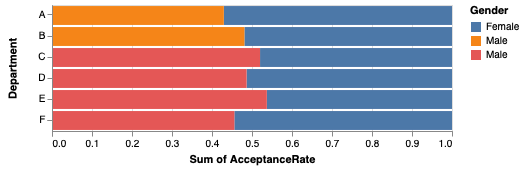

In [103]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('sum(AcceptanceRate)', stack="normalize"),
    y='Department',
    color='Gender'
)

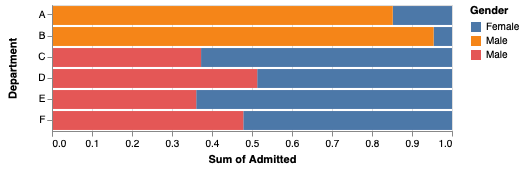

In [104]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('sum(Admitted)', stack="normalize"),
    y='Department',
    color='Gender'
)

# Problem 5

Here I decided to make 3 separate histograms to show the distribution of positive sentiment in each writer's work. Results would indicate that Shakespeare's plays tend to be more positive than Marlowe's.

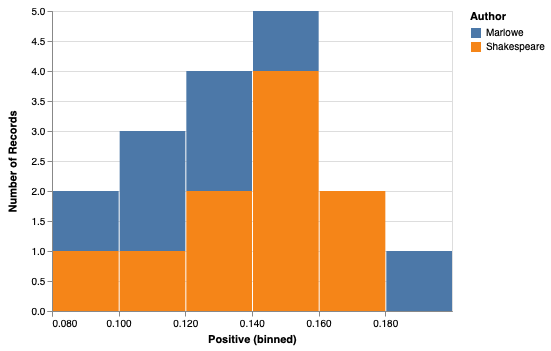

In [105]:
alt.Chart(sentiment_df).mark_bar().encode(
    alt.X("Positive", bin=True),
    y='count()', color='Author',
)

In [106]:
shakespeare_df = sentiment_df[sentiment_df['Author'] == 'Shakespeare']

In [107]:
Marlowe_df = sentiment_df[sentiment_df['Author'] == 'Marlowe']

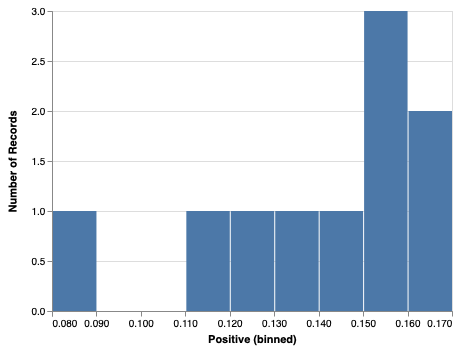

In [108]:
alt.Chart(shakespeare_df).mark_bar().encode(
    alt.X("Positive", bin=True),
    y='count()',
)

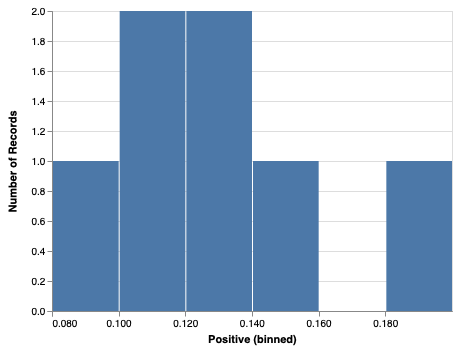

In [109]:
alt.Chart(Marlowe_df).mark_bar().encode(
    alt.X("Positive", bin=True),
    y='count()',
)

# Problem 6
From aggregating and grouping our data, and turning it into a simple histogram, we can see that Marlowe tends to write a wide variety of story lengths, while Shakespeare seemed to prefer his plays to be in the 20,000-30,000 word range. 

In [110]:
word_count_df.head()

,Text,Author,Word,Count,TFIDF
0,jew_of_malta.txt,Marlowe,﻿The,1,0.166667
1,jew_of_malta.txt,Marlowe,Project,83,11.857143
2,jew_of_malta.txt,Marlowe,Gutenberg,27,3.857143
3,jew_of_malta.txt,Marlowe,EBook,3,0.500000
4,jew_of_malta.txt,Marlowe,of,568,81.142857


In [111]:
aggregations = {'Count': 'sum',
               'Author': 'min'}
agg_word_count = word_count_df.groupby('Text').agg(aggregations)
agg_word_count.head()       

,Count,Author
Text,,
comedy_of_errors.txt,17979,Shakespeare
dido_queen_of_carthage.txt,17869,Marlowe
edward_II.txt,26114,Marlowe
edward_iii.txt,23008,Shakespeare
faustus.txt,22745,Marlowe


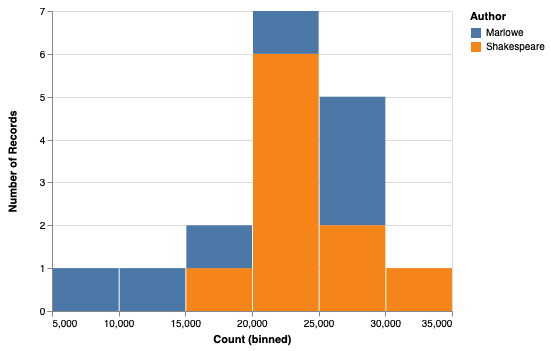

In [112]:
alt.Chart(agg_word_count).mark_bar().encode(
    alt.X("Count", bin=True),
    y='count()', color='Author',
)

# Problem 7

In [113]:
combined_df = sentiment_df.merge(agg_word_count, on = 'Text')
combined_df.head()

,Text,Author_x,Positive,Negative,Neutral,Count,Author_y
0,jew_of_malta.txt,Marlowe,0.120,0.090,0.790,28852,Marlowe
1,massacre_at_paris.txt,Marlowe,0.121,0.080,0.798,14383,Marlowe
2,tamburlaine.txt,Marlowe,0.141,0.091,0.768,27825,Marlowe
3,faustus.txt,Marlowe,0.119,0.089,0.792,22745,Marlowe
4,dido_queen_of_carthage.txt,Marlowe,0.087,0.062,0.851,17869,Marlowe


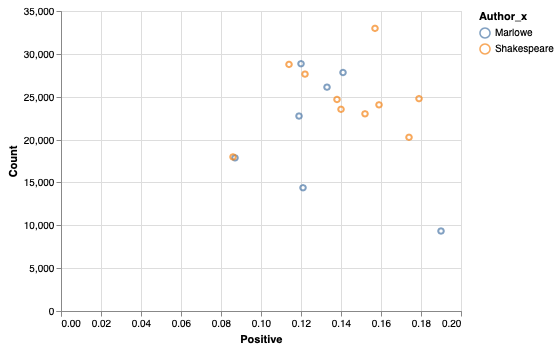

In [114]:
alt.Chart(combined_df).mark_point().encode(
    x='Positive',
    y='Count',
    color='Author_x'
    ).interactive()

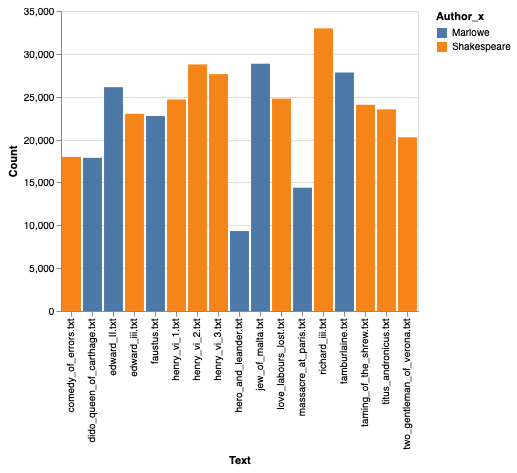

In [115]:
alt.Chart(combined_df).mark_bar().encode(
    x='Text',
    y='Count',
    color = 'Author_x'
)

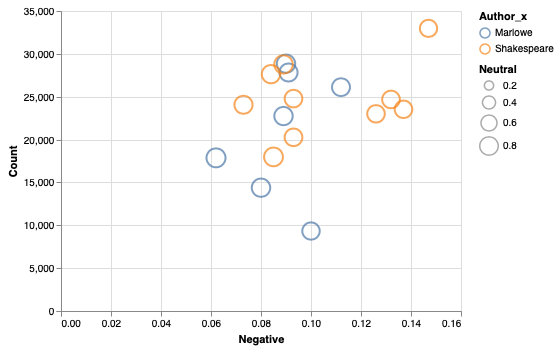

In [116]:
alt.Chart(combined_df).mark_point().encode(
    x='Negative',
    y='Count',
    color='Author_x',
    size = 'Neutral'
    ).interactive()